In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir(r"C:\Daymler\7. Miscelláneos\20.Cepal\Prod\Datos")

df=pd.read_excel("export_CHL_MEX_divisiones_mala.xlsx", sheet_name="emp_prod")




In [2]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   País               180 non-null    object 
 1   descripcion        180 non-null    object 
 2   conc               180 non-null    object 
 3   year               180 non-null    int64  
 4   Suma de prod_trab  180 non-null    float64
 5   Suma de emp        180 non-null    float64
 6   pm                 156 non-null    float64
 7   emp                156 non-null    float64
 8   rem                180 non-null    float64
 9   rem_emp            156 non-null    float64
 10  Unnamed: 10        156 non-null    float64
 11  tc_rem_emp         132 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 17.0+ KB


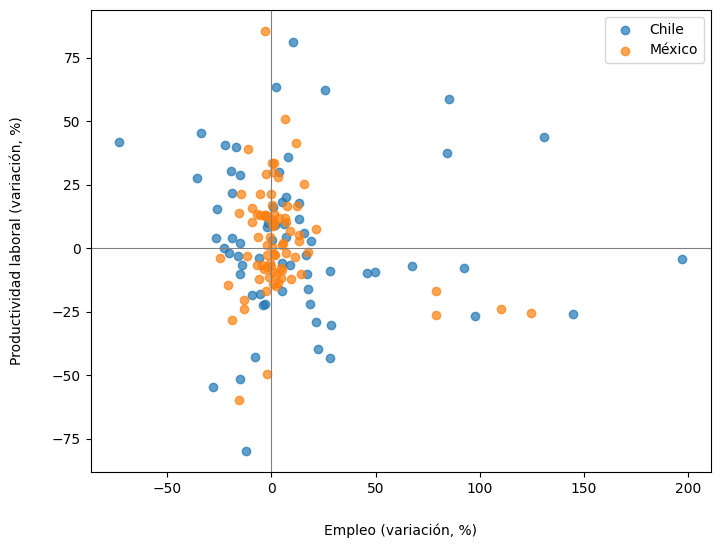

In [3]:

df_filtered = df[(df["pm"].between(-200, 200)) & (df["emp"].between(-200, 200))]

# 2. Gráfico de dispersión con colores por país
plt.figure(figsize=(8,6))
for pais, subset in df_filtered.groupby("País"):
    plt.scatter(subset["emp"], subset["pm"], label=pais, alpha=0.7)

# 3. Ejes y líneas de referencia
plt.axhline(0, color="gray", linewidth=0.8)
plt.axvline(0, color="gray", linewidth=0.8)

plt.xlabel("Empleo (variación, %)", labelpad=20)
plt.ylabel("Productividad laboral (variación, %)", labelpad=20)
plt.title("")
plt.legend(title="")
plt.show()

KeyError: 'temp'

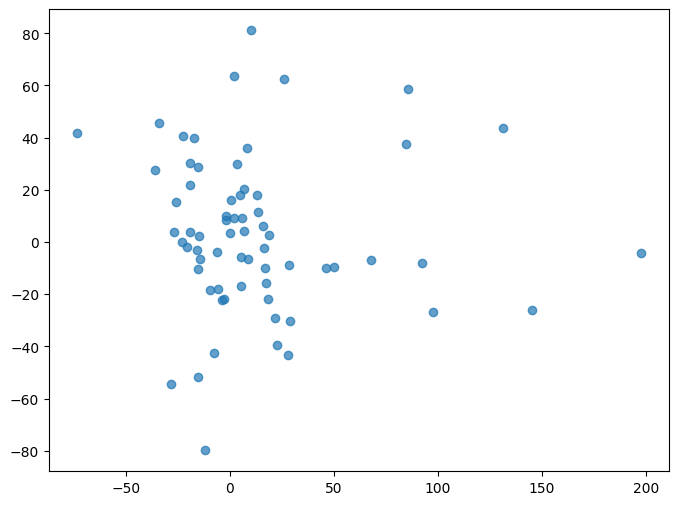

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filtrar outliers
df_filtered = df[(df["pm"].between(-200, 200)) & (df["emp"].between(-200, 200))]

plt.figure(figsize=(8,6))

# Diccionario para guardar los resultados
significance_results = {}

for pais, subset in df_filtered.groupby("País"):
    plt.scatter(subset["emp"], subset["pm"], label=pais, alpha=0.7)
    
    # Ajuste lineal con linregress
    slope, intercept, r_value, p_value, std_err = linregress(subset["emp"], subset["pm"])
    
    # Guardar resultados
    significance_results[pais] = {
        "pendiente": slope,
        "intercepto": intercept,
        "R2": r_value**2,
        "p_value": p_value,
        "significativo_90": p_value < 0.10,
        "significativo_95": p_value < 0.05,
        "significativo_99": p_value < 0.01
    }
    
    # Dibujar línea de tendencia
    x_vals = np.linspace(subset["tc_rem_emp"].min(), subset["tc_rem_emp"].max(), 100)
    plt.plot(x_vals, intercept + slope*x_vals, label="")

# Líneas de referencia
plt.axhline(0, color="gray", linewidth=0.8)
plt.axvline(0, color="gray", linewidth=0.8)

plt.xlabel("Empleo (variación, %)", labelpad=20)
plt.ylabel("Productividad laboral (variación, %)", labelpad=20)
plt.title("")
plt.legend()
plt.show()

# Mostrar resultados en consola
for pais, vals in significance_results.items():
    print(f"\n{pais}:")
    print(f"  Pendiente = {vals['pendiente']:.3f}")
    print(f"  R² = {vals['R2']:.3f}")
    print(f"  p-value = {vals['p_value']:.4f}")
    print(f"  Significativo al 90%: {vals['significativo_90']}")
    print(f"  Significativo al 95%: {vals['significativo_95']}")
    print(f"  Significativo al 99%: {vals['significativo_99']}")



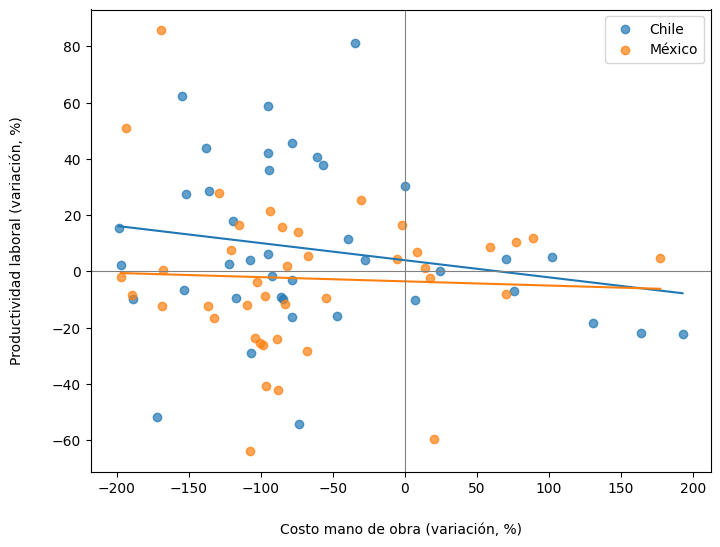

In [6]:

df_filtered = df[(df["pm"].between(-200, 200)) & (df["tc_rem_emp"].between(-200, 200))]

plt.figure(figsize=(8,6))

for pais, subset in df_filtered.groupby("País"):
    plt.scatter(subset["tc_rem_emp"], subset["pm"], label=pais, alpha=0.7)
    
    # Ajuste lineal (recta) para ese país
    m, b = np.polyfit(subset["tc_rem_emp"], subset["pm"], 1)
    x_vals = np.linspace(subset["tc_rem_emp"].min(), subset["tc_rem_emp"].max(), 100)
    plt.plot(x_vals, m*x_vals + b, label="")

# Líneas de referencia
plt.axhline(0, color="gray", linewidth=0.8)
plt.axvline(0, color="gray", linewidth=0.8)

plt.xlabel("Costo mano de obra (variación, %)", labelpad=20)
plt.ylabel("Productividad laboral (variación, %)", labelpad=20)
plt.title("")
plt.legend()
plt.show()


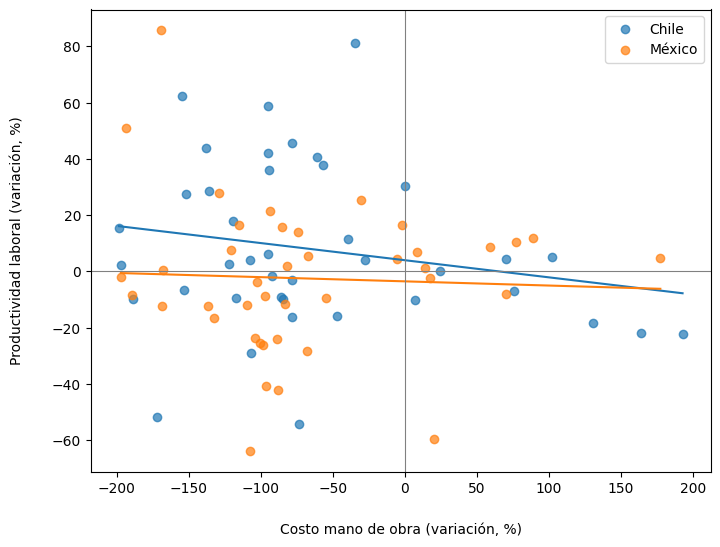


Chile:
  Pendiente = -0.061
  R² = 0.039
  p-value = 0.2206
  Significativo al 90%: False
  Significativo al 95%: False
  Significativo al 99%: False

México:
  Pendiente = -0.015
  R² = 0.002
  p-value = 0.7695
  Significativo al 90%: False
  Significativo al 95%: False
  Significativo al 99%: False


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filtrar outliers
df_filtered = df[(df["pm"].between(-200, 200)) & (df["tc_rem_emp"].between(-200, 200))]

plt.figure(figsize=(8,6))

# Diccionario para guardar los resultados
significance_results = {}

for pais, subset in df_filtered.groupby("País"):
    plt.scatter(subset["tc_rem_emp"], subset["pm"], label=pais, alpha=0.7)
    
    # Ajuste lineal con linregress
    slope, intercept, r_value, p_value, std_err = linregress(subset["tc_rem_emp"], subset["pm"])
    
    # Guardar resultados
    significance_results[pais] = {
        "pendiente": slope,
        "intercepto": intercept,
        "R2": r_value**2,
        "p_value": p_value,
        "significativo_90": p_value < 0.10,
        "significativo_95": p_value < 0.05,
        "significativo_99": p_value < 0.01
    }
    
    # Dibujar línea de tendencia
    x_vals = np.linspace(subset["tc_rem_emp"].min(), subset["tc_rem_emp"].max(), 100)
    plt.plot(x_vals, intercept + slope*x_vals, label="")

# Líneas de referencia
plt.axhline(0, color="gray", linewidth=0.8)
plt.axvline(0, color="gray", linewidth=0.8)

plt.xlabel("Costo mano de obra (variación, %)", labelpad=20)
plt.ylabel("Productividad laboral (variación, %)", labelpad=20)
plt.title("")
plt.legend()
plt.show()

# Mostrar resultados en consola
for pais, vals in significance_results.items():
    print(f"\n{pais}:")
    print(f"  Pendiente = {vals['pendiente']:.3f}")
    print(f"  R² = {vals['R2']:.3f}")
    print(f"  p-value = {vals['p_value']:.4f}")
    print(f"  Significativo al 90%: {vals['significativo_90']}")
    print(f"  Significativo al 95%: {vals['significativo_95']}")
    print(f"  Significativo al 99%: {vals['significativo_99']}")
